# HANDS-ON 01

2023-04-02

Considerations:

- Range $[-1,2]$ to search for a specific root value
- Precision $ \ \varepsilon = 1 \cdot 10^{-6}$
- 50 iterations

## Secant method

Let a coordinate plane have two axes, the horizontal being called the x-axis and the vertical the y-axis. The secant method requires two initial guesses ($x_1$ and $x_2$) of the root on the x-axis, and the function f(x) ("y-axis") is assumed to be approximately linear near the root, so the next guessed value $x_3$ to find the root can be computed by linear interpolation between $x_1$ and $x_2$.

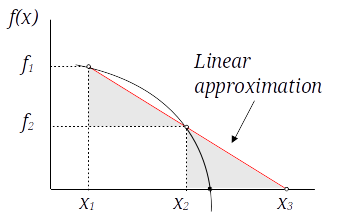

The relationship between the shaded triangles in the figure is given by the equation:

$$ \frac{f_2}{x_3 - x_2} = \frac{f_1 - f_2}{x_2 - x_1} $$

Arranging the equation, the next estimated value $x_3$ is given by (the Secant formula):

$$ x_3 = x_2 - f_2 \frac{x_2 - x_1}{f_2 - f_1} $$

After the estimated $x_3$ root is calculated from the previous equation, $x_1$ or $x_2$ is replaced by $x_3$. The procedure is then repeated until $ |f(x)| < \varepsilon $.

## Code

Based on: https://towardsdatascience.com/implementing-various-root-finding-algorithms-in-python-67917ef090b3

In [1]:
import math as mt, numpy as np, matplotlib.pyplot as plt

Equations:

In [14]:
u1_expr = "x - cos(x)"
def f1(x):
    return x - np.cos(x)


u2_expr = "x**3 - 9.0 * x**2 + 5.0"
def f2(x):
    return x**3 - 9.0 * x**2 + 5.0


u3_expr = "x * (3 - x**2) / 2.0"
def f3(x):
    return x * (3 - x**2) / 2.0


u4_expr = "(x**4 - 10 * x**2) * exp(-x) + 1"
def f4(x):
    return (x**4 - 10 * x**2) * np.exp(-x) + 1


u5_expr = "(4 * pi * x) - (400 * x**-2)"
def f5(x):
    return (4 * np.pi * x) - (400 * x**-2)

Main routine:

In [28]:
def secant(f, x1, x2, tol):
    i = 0
    a = np.empty(0)
    b = np.empty(0)
    c = np.empty(0)
    d = np.empty(0)
    print(f" i     x1       f(x1)      x2       f(x2)")
    print(f"---  -------   -------   -------   -------")
    f1 = f(x1)
    while abs(f1) > tol:
        f1 = f(x1)
        f2 = f(x2)
        print(f"{i:2}:  {x1:+#.4f},  {f1:+#.4f},  {x2:+#.4f},  {f2:+#.4f}")
        a = np.append(a, x1)
        b = np.append(b, f1)
        c = np.append(c, x2)
        d = np.append(d, f2)
        # option 1 :
        xtemp = x1
        x1 = x1 - fx1 * (x1 - x2) / (fx1 - fx2)
        x2 = xtemp
        # aternative, option 2 :
        # x3 = x2 - f2 * (x2 - x1) / (f2 - f1)
        # x2 = x1
        # x1 = x3
        i += 1
    print(f"\nSolution:  x = {x1:+#.4f},  f(x) = {f1:+#.4f}\n")
    return a, b, c, d

Plot:

In [30]:
x_plt = np.linspace(-1, 2, 100)

def curve(f, a, b, c, d, eq):
    plt.plot(x_plt, f(x_plt), '-r')
    plt.scatter(a, b, color='green')
    plt.scatter(x=c, y=d, color='blue')
    plt.title("f(x) = " + eq)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid()
    plt.axhline(y=0, color='black')
    plt.axvline(x=0, color='black')
    plt.show()

## Equation 1

In [27]:
%%timeit -r 1 -n 1
a, b, c, d = secant(f1, x1=-1.0, x2=2.0, tol=1.0e-6)

 i     x1       f(x1)      x2       f(x2)
---  -------   -------   -------   -------
 0:  -1.0000,  -1.5403,  +2.0000,  +2.4161
 1:  +0.1679,  -0.8180,  -1.0000,  -1.5403
 2:  +1.4906,  +1.4105,  +0.1679,  -0.8180
 3:  +0.6534,  -0.1406,  +1.4906,  +1.4105
 4:  +0.7293,  -0.0163,  +0.6534,  -0.1406
 5:  +0.7393,  +0.0003,  +0.7293,  -0.0163

Solution:  x = +0.7391,  f(x) = -0.0000

859 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


\
The blue dots on the curve below represent each iteration of the method. As the iterations are carried out, the tendency is for the blue dots to approach the root:

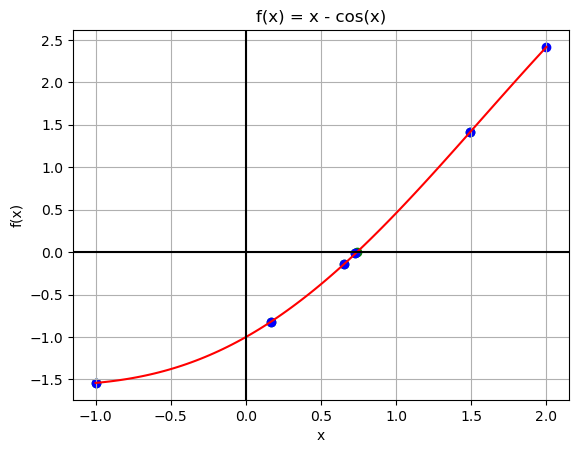

In [26]:
curve(f1, a, b, c, d, u1_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

## Equation 2

In [135]:
%%timeit -r 1 -n 1
a, b, c, d = secant(f2, x1=-1.0, x2=0, tol=1.0e-6)

 i     x1       f(x1)      x2       f(x2)
---  -------   -------   -------   -------
 0:  -1.0000,  -5.0000,  +0.0000,  +5.0000
 1:  -0.5000,  +2.6250,  -1.0000,  -5.0000
 2:  -0.6721,  +0.6305,  -0.5000,  +2.6250
 3:  -0.7265,  -0.1344,  -0.6721,  +0.6305
 4:  -0.7170,  +0.0048,  -0.7265,  -0.1344
 5:  -0.7173,  +0.0000,  -0.7170,  +0.0048

Solution:  x = -0.7173,  f(x) = -0.0000

1.46 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


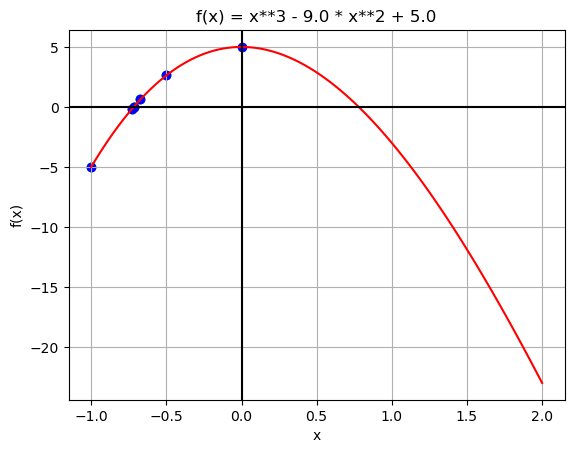

In [116]:
curve(f2, a, b, c, d, u2_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

In [136]:
%%timeit -r 1 -n 1
a, b, c, d = secant(f2, x1=0.50, x2=0, tol=1.0e-6)

 i     x1       f(x1)      x2       f(x2)
---  -------   -------   -------   -------
 0:  +0.5000,  +2.8750,  +0.0000,  +5.0000
 1:  +1.1765,  -5.8284,  +0.5000,  +2.8750
 2:  +0.7235,  +0.6681,  +1.1765,  -5.8284
 3:  +0.7700,  +0.1199,  +0.7235,  +0.6681
 4:  +0.7802,  -0.0039,  +0.7700,  +0.1199
 5:  +0.7799,  +0.0000,  +0.7802,  -0.0039

Solution:  x = +0.7799,  f(x) = +0.0000

1.27 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


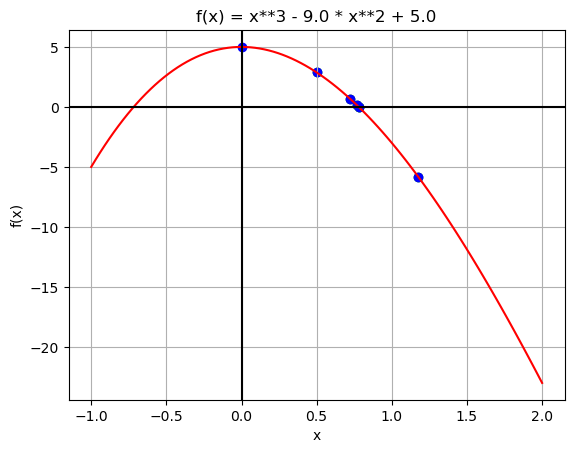

In [102]:
curve(f2, a, b, c, d, u2_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

## Equation 3

In [137]:
%%timeit -r 1 -n 1
a, b, c, d = secant(f3, x1=-.5, x2=2.0, tol=1.0e-6)

 i     x1       f(x1)      x2       f(x2)
---  -------   -------   -------   -------
 0:  -0.5000,  -0.6875,  +2.0000,  -1.0000
 1:  -6.0000,  +99.0000,  -0.5000,  -0.6875
 2:  -0.5379,  -0.7291,  -6.0000,  +99.0000
 3:  -0.5779,  -0.7703,  -0.5379,  -0.7291
 4:  +0.1679,  +0.2495,  -0.5779,  -0.7703
 5:  -0.0145,  -0.0218,  +0.1679,  +0.2495
 6:  +0.0001,  +0.0002,  -0.0145,  -0.0218

Solution:  x = -0.0000,  f(x) = -0.0000

1.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [138]:
%%timeit -r 1 -n 1
a, b, c, d = secant(f3, x1=1.0, x2=2.0, tol=1.0e-6)

 i     x1       f(x1)      x2       f(x2)
---  -------   -------   -------   -------
 0:  +1.0000,  +1.0000,  +2.0000,  -1.0000
 1:  +1.5000,  +0.5625,  +1.0000,  +1.0000
 2:  +2.1429,  -1.7055,  +1.5000,  +0.5625
 3:  +1.6594,  +0.2043,  +2.1429,  -1.7055
 4:  +1.7112,  +0.0616,  +1.6594,  +0.2043
 5:  +1.7335,  -0.0042,  +1.7112,  +0.0616
 6:  +1.7320,  +0.0001,  +1.7335,  -0.0042

Solution:  x = +1.7321,  f(x) = +0.0000

1.18 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


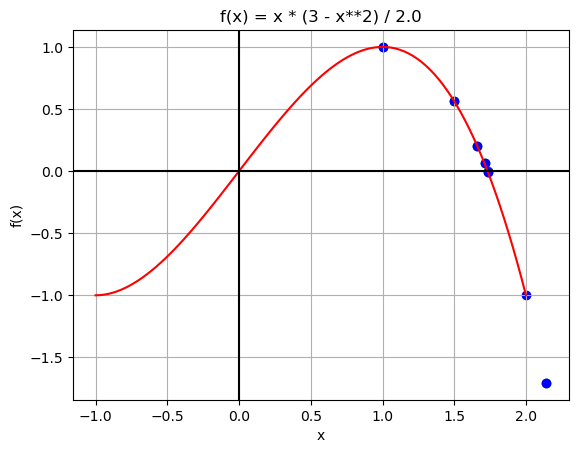

In [128]:
curve(f3, a, b, c, d, u3_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

## Equation 4

In [139]:
%%timeit -r 1 -n 1
a, b, c, d = secant(f4, x1=-1.0, x2=2.0, tol=1.0e-6)

 i     x1       f(x1)      x2       f(x2)
---  -------   -------   -------   -------
 0:  -1.0000,  -23.4645,  +2.0000,  -2.2480
 1:  +2.3179,  -1.4484,  -1.0000,  -23.4645
 2:  +2.5361,  -0.8169,  +2.3179,  -1.4484
 3:  +2.8185,  +0.0250,  +2.5361,  -0.8169
 4:  +2.8101,  +0.0002,  +2.8185,  +0.0250

Solution:  x = +2.8101,  f(x) = -0.0000

1.72 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [140]:
%%timeit -r 1 -n 1
a, b, c, d = secant(f4, x1=-1.0, x2=0.0, tol=1.0e-6)

 i     x1       f(x1)      x2       f(x2)
---  -------   -------   -------   -------
 0:  -1.0000,  -23.4645,  +0.0000,  +1.0000
 1:  -0.0409,  +0.9826,  -1.0000,  -23.4645
 2:  -0.0794,  +0.9317,  -0.0409,  +0.9826
 3:  -0.7857,  -11.7095,  -0.0794,  +0.9317
 4:  -0.1315,  +0.8032,  -0.7857,  -11.7095
 5:  -0.1735,  +0.6431,  -0.1315,  +0.8032
 6:  -0.3422,  -0.6298,  -0.1735,  +0.6431
 7:  -0.2587,  +0.1387,  -0.3422,  -0.6298
 8:  -0.2738,  +0.0216,  -0.2587,  +0.1387
 9:  -0.2766,  -0.0010,  -0.2738,  +0.0216
10:  -0.2765,  +0.0000,  -0.2766,  -0.0010

Solution:  x = -0.2765,  f(x) = +0.0000

2.52 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


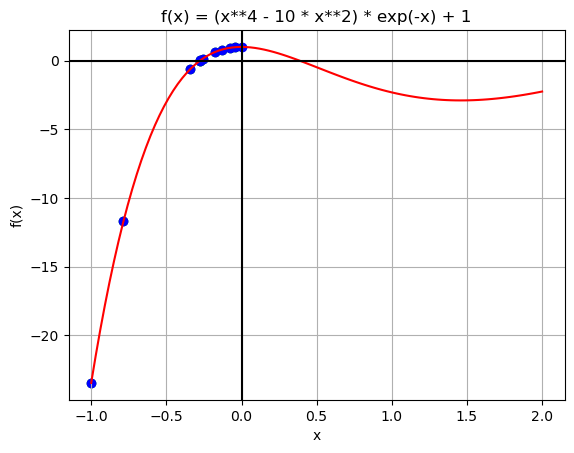

In [114]:
curve(f4, a, b, c, d, u4_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

In [141]:
%%timeit -r 1 -n 1
a, b, c, d = secant(f4, x1=0.0, x2=1.0, tol=1.0e-6)

 i     x1       f(x1)      x2       f(x2)
---  -------   -------   -------   -------
 0:  +0.0000,  +1.0000,  +1.0000,  -2.3109
 1:  +0.3020,  +0.3317,  +0.0000,  +1.0000
 2:  +0.4520,  -0.2734,  +0.3020,  +0.3317
 3:  +0.3842,  +0.0095,  +0.4520,  -0.2734
 4:  +0.3865,  +0.0002,  +0.3842,  +0.0095

Solution:  x = +0.3866,  f(x) = -0.0000

1.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


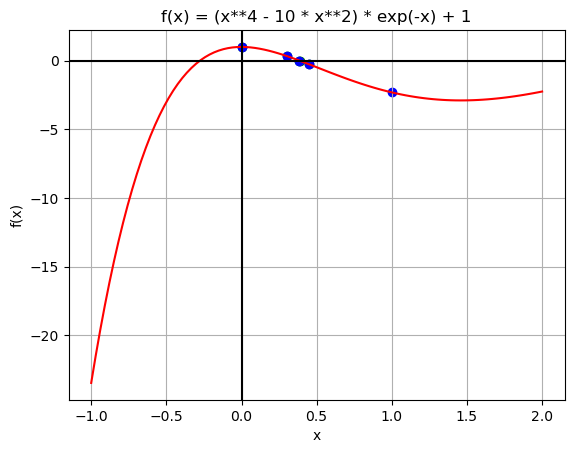

In [110]:
curve(f4, a, b, c, d, u4_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

## Equation 5

In [142]:
%%timeit -r 1 -n 1
a, b, c, d = secant(f5, x1=-1.0, x2=2.0, tol=1.0e-6)

 i     x1       f(x1)      x2       f(x2)
---  -------   -------   -------   -------
 0:  -1.0000,  -412.5664,  +2.0000,  -74.8673
 1:  +2.6651,  -22.8258,  -1.0000,  -412.5664
 2:  +2.8797,  -12.0458,  +2.6651,  -22.8258
 3:  +3.1196,  -1.8997,  +2.8797,  -12.0458
 4:  +3.1645,  -0.1770,  +3.1196,  -1.8997
 5:  +3.1691,  -0.0028,  +3.1645,  -0.1770
 6:  +3.1692,  -0.0000,  +3.1691,  -0.0028

Solution:  x = +3.1692,  f(x) = -0.0000

2.07 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


/tmp/ipykernel_42769/1177562251.py:21: RuntimeWarning: divide by zero encountered in power
  return (4 * np.pi * x) - (400 * x**-2)


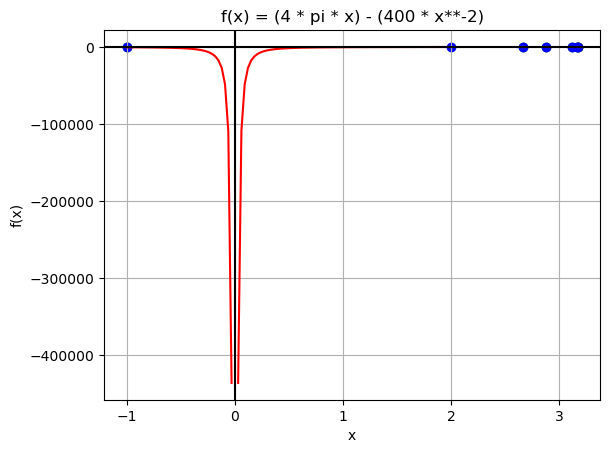

In [112]:
curve(f5, a, b, c, d, u5_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

# References

KIUSALAAS, J. Numerical Methods in Engineering with Python 3. [S. l.]: Cambridge University Press, 2013.

ONGKO, G. C. Implementing Various Root-Finding Algorithms in Python. 12 Apr. 2022. Medium. Available at: https://towardsdatascience.com/implementing-various-root-finding-algorithms-in-python-67917ef090b3. Accessed on: 2 Apr. 2023.

